In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comp = pd.read_csv("cpugpu.csv")

In [3]:
comp.head()

,Index,UserID,gameRating,desktopRating,workRating,CPU,CPURating,GPU,GPURating
0,0,36276693,96%,89%,76%,AMD Ryzen 3 3200G,80.90%,Nvidia RTX 2060S (Super),113.20%
1,1,36276701,121%,91%,122%,AMD Ryzen 7 2700X,84%,Nvidia RTX 3060-Ti,139.80%
2,2,36276704,12%,76%,12%,Intel Core i7-4910MQ,79.80%,Nvidia Quadro K2100M,7.20%
3,3,36280154,24%,77%,19%,Intel Core i5-3470S,69.40%,Nvidia GTX 660-Ti,27%
4,4,36280160,36%,79%,29%,Intel Core i7-2600,74.50%,Nvidia GTX 1650,45.70%


In [4]:
#Map GPU Type for each observation
def map_gpu_type(name):
    name = str(name)
    type = ''
    if "AMD" in name:
        type = "AMD"
    elif "Nvidia" in name:
        type = "Nvidia"
    elif "Intel" in name:
        type = "Intel"
    else:
        type = "Other"
    return type

def map_gpu_data(gpu_data):
    gpu_type = []
    for obs in gpu_data:
        obs_type = map_gpu_type(obs)
        gpu_type.append(obs_type)
    return gpu_type

def map_cpu_type(name):
    name = str(name)
    type = ''
    if "AMD" in name:
        type = "AMD"
    elif "Intel" in name:
        type = "Intel"
    else:
        type = "Other"
    return type

def map_cpu_data(cpu_data):
    cpu_type = []
    for obs in cpu_data:
        obs_type = map_cpu_type(obs)
        cpu_type.append(obs_type)
    return cpu_type

#Test

gpu = ["Nvidia", "Nvidia", "AMD", "Intel", "AMD", "meow"]
cpu = ["AMD Ryzen 9 3900", "Intel i7 9900k", "AMD", "Intel", "AMD", "AMD", "Intel"]
gpu_cat = map_gpu_data(gpu)
cpu_cat = map_cpu_data(cpu)
print(gpu_cat)
print(cpu_cat)

['Nvidia', 'Nvidia', 'AMD', 'Intel', 'AMD', 'Other']
['AMD', 'Intel', 'AMD', 'Intel', 'AMD', 'AMD', 'Intel']


In [5]:
comp["GPUType"] = map_gpu_data(comp["GPU"])

In [6]:
comp["CPUType"] = map_cpu_data(comp["CPU"])

In [7]:
comp.head()

,Index,UserID,gameRating,desktopRating,workRating,CPU,CPURating,GPU,GPURating,GPUType,CPUType
0,0,36276693,96%,89%,76%,AMD Ryzen 3 3200G,80.90%,Nvidia RTX 2060S (Super),113.20%,Nvidia,AMD
1,1,36276701,121%,91%,122%,AMD Ryzen 7 2700X,84%,Nvidia RTX 3060-Ti,139.80%,Nvidia,AMD
2,2,36276704,12%,76%,12%,Intel Core i7-4910MQ,79.80%,Nvidia Quadro K2100M,7.20%,Nvidia,Intel
3,3,36280154,24%,77%,19%,Intel Core i5-3470S,69.40%,Nvidia GTX 660-Ti,27%,Nvidia,Intel
4,4,36280160,36%,79%,29%,Intel Core i7-2600,74.50%,Nvidia GTX 1650,45.70%,Nvidia,Intel


In [8]:
comp["gameRating"] = comp["gameRating"].str.rstrip("%").astype('float')

In [9]:
comp["desktopRating"] = comp["desktopRating"].str.rstrip("%").astype('float')

In [10]:
comp["workRating"] = comp["workRating"].str.rstrip("%").astype('float')

In [11]:
comp.dtypes

Index              int64
UserID             int64
gameRating       float64
desktopRating    float64
workRating       float64
CPU               object
CPURating         object
GPU               object
GPURating         object
GPUType           object
CPUType           object
dtype: object

In [12]:
comp["CPURating"] = comp["CPURating"].str.rstrip("%").astype('float')

In [13]:
comp["GPURating"] = comp["GPURating"].str.rstrip("%").astype('float')

In [15]:
comp.head()

,Index,UserID,gameRating,desktopRating,workRating,CPU,CPURating,GPU,GPURating,GPUType,CPUType
0,0,36276693,96.0,89.0,76.0,AMD Ryzen 3 3200G,80.9,Nvidia RTX 2060S (Super),113.2,Nvidia,AMD
1,1,36276701,121.0,91.0,122.0,AMD Ryzen 7 2700X,84.0,Nvidia RTX 3060-Ti,139.8,Nvidia,AMD
2,2,36276704,12.0,76.0,12.0,Intel Core i7-4910MQ,79.8,Nvidia Quadro K2100M,7.2,Nvidia,Intel
3,3,36280154,24.0,77.0,19.0,Intel Core i5-3470S,69.4,Nvidia GTX 660-Ti,27.0,Nvidia,Intel
4,4,36280160,36.0,79.0,29.0,Intel Core i7-2600,74.5,Nvidia GTX 1650,45.7,Nvidia,Intel


In [16]:
comp.dtypes

Index              int64
UserID             int64
gameRating       float64
desktopRating    float64
workRating       float64
CPU               object
CPURating        float64
GPU               object
GPURating        float64
GPUType           object
CPUType           object
dtype: object

In [19]:
AMD = pd.read_csv("AMD.csv")

In [20]:
AMD.head()

,Index,Model,Family,Line,Platform,OPN Tray,OPN PIB,OPN MPK,Launch Date,# of CPU Cores,...,System Memory Specification,System Memory Type,Memory Channels,Graphics Frequency,GPU Base,Graphics Model,Graphics Core Count,Supported Technologies,DisplayPort,HDMI
0,0,AMD Ryzen 9 5950X,AMD Ryzen™ Processors,AMD Ryzen™ 9 Desktop Processors,Boxed Processor,100-000000059,100-100000059WOF,NaN,11/5/2020,16.0,...,Up to 3200MHz,DDR4,NaN,NaN,NaN,Discrete Graphics Card Required,NaN,"AMD ""Zen 3"" Core Architecture, AMD StoreMI Tec...",NaN,NaN
1,1,AMD Ryzen 9 5900X,AMD Ryzen™ Processors,AMD Ryzen™ 9 Desktop Processors,Boxed Processor,100-000000061,100-100000061WOF,NaN,11/5/2020,12.0,...,Up to 3200MHz,DDR4,NaN,NaN,NaN,Discrete Graphics Card Required,NaN,"AMD ""Zen 3"" Core Architecture, AMD StoreMI Tec...",NaN,NaN
2,2,AMD Ryzen 7 5800X,AMD Ryzen™ Processors,AMD Ryzen™ 7 Desktop Processors,Boxed Processor,100-000000063,100-100000063WOF,NaN,11/5/2020,8.0,...,Up to 3200MHz,DDR4,NaN,NaN,NaN,Discrete Graphics Card Required,NaN,"AMD ""Zen 3"" Core Architecture, AMD StoreMI Tec...",NaN,NaN
3,3,AMD Ryzen 5 5600X,AMD Ryzen™ Processors,AMD Ryzen™ 5 Desktop Processors,Boxed Processor,100-000000065,100-100000065BOX,100-100000065MPK,11/5/2020,6.0,...,Up to 3200MHz,DDR4,NaN,NaN,NaN,Discrete Graphics Card Required,NaN,"AMD ""Zen 3"" Core Architecture, AMD StoreMI Tec...",NaN,NaN
4,4,AMD Ryzen 9 3900XT,AMD Ryzen™ Processors,AMD Ryzen™ 9 Desktop Processors,Boxed Processor,NaN,100-100000277WOF,NaN,7/2020,12.0,...,Up to 3200MHz,DDR4,NaN,NaN,NaN,Discrete Graphics Card Required,NaN,"AMD StoreMI Technology, AMD Ryzen™ Master Utility",NaN,NaN


In [36]:
hm_data = comp.pivot_table(columns = "CPU", index="GPU", values = "gameRating" )

In [37]:
hm_data.head()

CPU,AMD A10-6700 APU (2013 D.Ri),AMD A10-7860K APU (2014 D.Ka),AMD A10-9600P APU (2016 M.BR),AMD A4-6210 APU R3 Graphics,AMD A8-6600K APU,AMD Athlon 3000G,AMD Athlon II X4 860K,AMD E-450 APU,AMD FX-4300,AMD FX-4350,...,Intel Xeon E-2176M,Intel Xeon E-2186M,Intel Xeon E3-1231 v3,Intel Xeon E3-1240,Intel Xeon E31220,Intel Xeon E5-1650 v2,Intel Xeon E5-2670,Intel Xeon E5-2678 v3,Intel Xeon W3550,Intel Xeon X5687
GPU,,,,,,,,,,,,,,,,,,,,,
AMD HD 5770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD HD 7770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD HD 7790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD HD 7850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMD HD 7870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
import seaborn as sns; sns.set_theme()

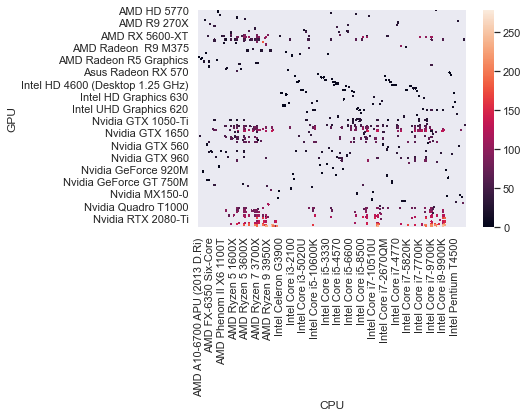

In [39]:
ax = sns.heatmap(hm_data)

<AxesSubplot:xlabel='CPU', ylabel='GPU'>

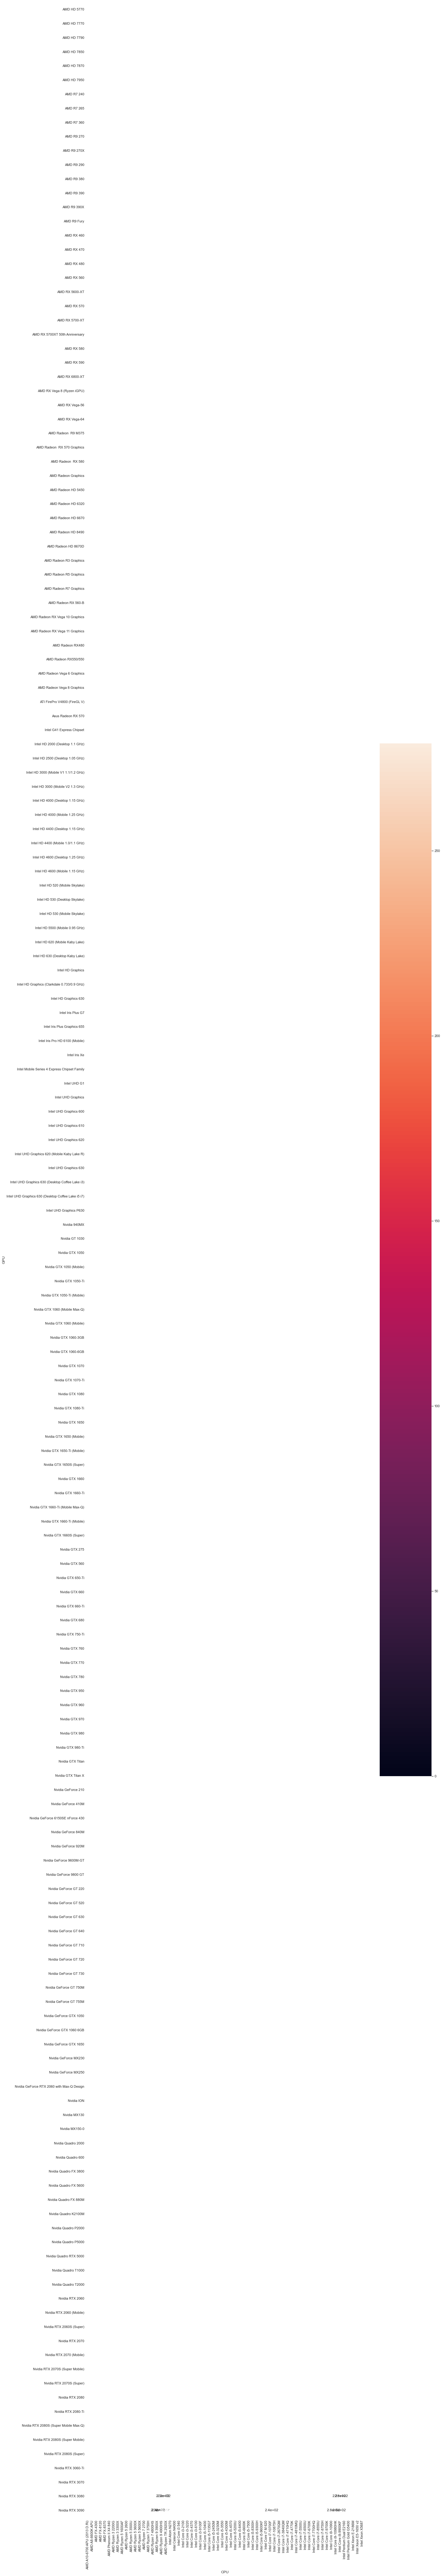

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,150))
ax= plt.subplot(111)         # Sample figsize in inches
sns.heatmap(hm_data, annot=True, linewidths=15, ax=ax)